In [1]:
%pip install pulp

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install haversine

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pulp
from haversine import haversine, Unit

In [4]:
df = pd.read_csv('gifts.csv')
df = df.sample(n=500, replace=False)
northpole = pd.DataFrame([[0, 90, 0, 0]], columns=['GiftId', 'Latitude', 'Longitude', 'Weight']).iloc[0]
northpole

GiftId        0
Latitude     90
Longitude     0
Weight        0
Name: 0, dtype: int64

In [5]:
sorted_weight = df.sort_values(by=['Weight'],ascending=False)
sorted_weight


GiftId   Latitude  Longitude  Weight
99509   99510  -1.921363 -59.679418    50.0
53316   53317  51.891518  48.800179    50.0
26397   26398  44.909027 -68.749538    50.0
95919   95920  41.433206 -93.878230    50.0
25184   25185 -12.496533  27.052909    50.0
...       ...        ...        ...     ...
49902   49903  47.789414  92.330009     1.0
83338   83339   6.178655  -1.884987     1.0
95856   95857  -6.355352 -71.407783     1.0
95523   95524  14.091087  43.553297     1.0
24515   24516  18.997844  11.947601     1.0

[500 rows x 4 columns]

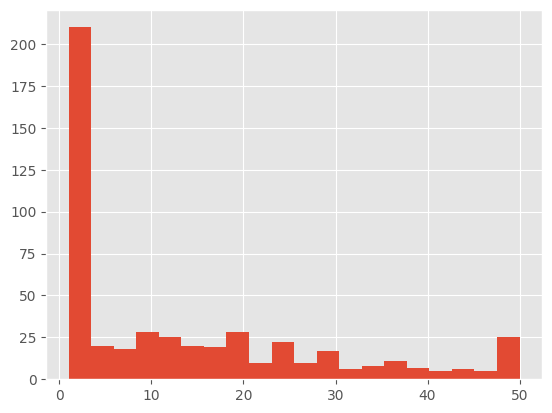

In [6]:
x = sorted_weight["Weight"]
plt.style.use('ggplot')
plt.hist(x, bins=20)
plt.show()

In [7]:
def findNext(startPoint,points):
    distances = np.array([haversine((startPoint[0],startPoint[1]),(point[0],point[1])) for point in points])
    best_ind = np.argmin(distances)
    return points[best_ind]

In [8]:
currentpoint = northpole
remainingVectors = df
path = pd.DataFrame(columns=['GiftId', 'Latitude', 'Longitude', 'Weight'])

while len(remainingVectors) > 0:
    currentpoint = findNext(currentpoint,remainingVectors)
    remainingVectors.remove(currentpoint)
    path.append(currentpoint)


path


TypeError: '<' not supported between instances of 'str' and 'int'